<div class="alert alert-block alert-info">
    <h1>Análisis de Series Temporales - 2024</h1>
    <h3>Clase 1</h3>
    <h5>Ejercitacion asincronica</h5>
        <p>Docente: Rodrigo Del Rosso<p>
        <p>Asistentes: Sebastián Calcagno y Braian Drago <p>
</div>



<p> <em> En el desarrollo de la siguiente actividad, se les requerirá llevar a cabo ejercicios prácticos y responder preguntas teóricas, las cuales serán abordadas en los espacios asignados para ello.</em> </p>
<b><font size="5"> El ejercicio finaliza con la leyenda "FIN DEL EJERCICIO ASINCRONICO" </b>

In [ ]:
# De ser necesario, instalar librerias
# Ejemplo =
# !pip install yfinance

In [ ]:
#Importamos librerias
import yfinance as yf
import matplotlib.pyplot as plt
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [ ]:
# En el ejemplo en cuestion, analizamos el intervalo de tiempo que va entre
comienzo_fecha = '2021-01-02'

# y la siguiente fecha
fin_fecha = '2023-01-01'

In [ ]:
# Obtenga datos cercanos de Yahoo Finance para la empresa Alphabet Inc. (GOOG)
ticker_list = ['GOOG']
data = yf.download(ticker_list, start=comienzo_fecha, end=fin_fecha)[['Adj Close']]
data = data.rename(columns={'Adj Close': 'Adj_Close'})  # Modificamos el nombre unicamente por comodidad de manejo de la variable
# Primera aproximacion a los datos
data.head()

[*********************100%***********************]  1 of 1 completed


,Adj_Close
Date,
2021-01-04,86.200310
2021-01-05,86.832756
2021-01-06,86.551941
2021-01-07,89.143578
2021-01-08,90.139130


**EJERCICIO 1=**

Realice una descomposición de la serie en sus componentes y proporcione una breve interpretación de los gráficos obtenidos.

In [ ]:
# Modulo para uso exclusivo aqui
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
print(f"{data.index.min()} {data.index.max()}")

2021-01-04 00:00:00 2022-12-30 00:00:00


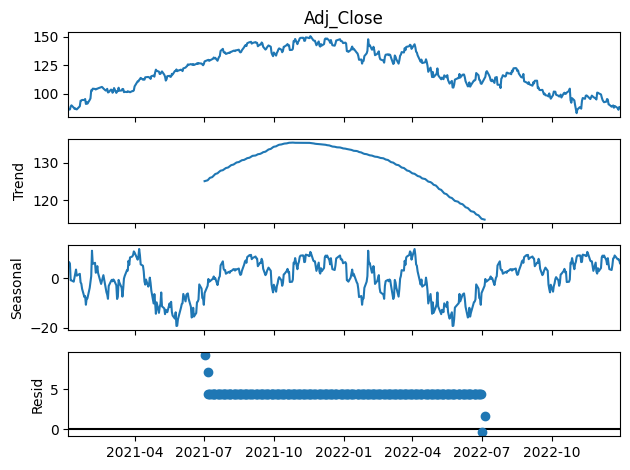

In [ ]:
# ESPACIO PARA CODIGO DE DESCOMPOSICION DE LA SERIE = ADITIVA

result = seasonal_decompose(data['Adj_Close'], model='additive', period=251)

'''
"period=252" indica un ciclo completo anual basado en los días hábiles del mercado, que se usa con frecuencia en series temporales financieras.
'''

# Graficar los resultados
result.plot()
plt.show()



In [ ]:
""" ESCRIBA AQUI SU INTERPRETACION DE LOS GRAFICOS=



"""

Claro, le proporcionaré una interpretación detallada del gráfico que muestra la descomposición de una serie temporal para el precio de cierre ajustado (Adj_Close) de lo que parece ser un activo financiero. El gráfico está dividido en cuatro paneles, cada uno mostrando un componente diferente de la serie temporal:

**Panel superior (Adj_Close):**

Muestra la serie temporal original del precio de cierre ajustado.
Se observa una tendencia general al alza desde inicios de 2021 hasta finales de 2021, seguida de una tendencia a la baja durante 2022.
Hay fluctuaciones notables a lo largo de todo el período.


**Segundo panel (Trend):**

Representa la tendencia a largo plazo de la serie.
Confirma lo observado en el panel superior: un aumento sostenido hasta finales de 2021, seguido de una disminución constante durante 2022.
Esta línea suaviza las fluctuaciones a corto plazo para mostrar la dirección general del movimiento.


**Tercer panel (Seasonal):**

Muestra el componente estacional de la serie.
Se observan patrones repetitivos que sugieren una estacionalidad en los datos.
Las fluctuaciones parecen tener una periodicidad regular, posiblemente relacionada con ciclos anuales o trimestrales en el mercado financiero.


**Panel inferior (Resid):**

Representa los residuos o el componente irregular de la serie.
Estos son los movimientos que no se explican por la tendencia o la estacionalidad.
La mayoría de los residuos parecen estar agrupados alrededor de cero, con algunos valores atípicos notables.



**Interpretación general:**

* El activo experimentó un crecimiento significativo en 2021, posiblemente debido a condiciones de mercado favorables o buen desempeño de la empresa.
* En 2022, hubo un cambio claro en la tendencia, con una disminución constante en el precio, lo que podría indicar un cambio en las condiciones del mercado o en la percepción del activo.
* Existe un patrón estacional claro que afecta el precio, lo que sugiere que ciertos períodos del año tienden a ser más favorables o desfavorables para este activo.
* Los residuos muestran que hay eventos o factores no explicados por la tendencia o estacionalidad que ocasionalmente causan movimientos significativos en el precio.

Esta descomposición es útil para:

* Entender los factores que impulsan el movimiento del precio.
* Identificar patrones cíclicos que podrían ayudar en la predicción de movimientos futuros.
* Aislar eventos inusuales (residuos grandes) que podrían merecer un análisis más profundo.

En resumen, este gráfico proporciona una visión clara de cómo diferentes componentes (tendencia, estacionalidad y factores aleatorios) contribuyen al comportamiento general del precio del activo a lo largo del tiempo.


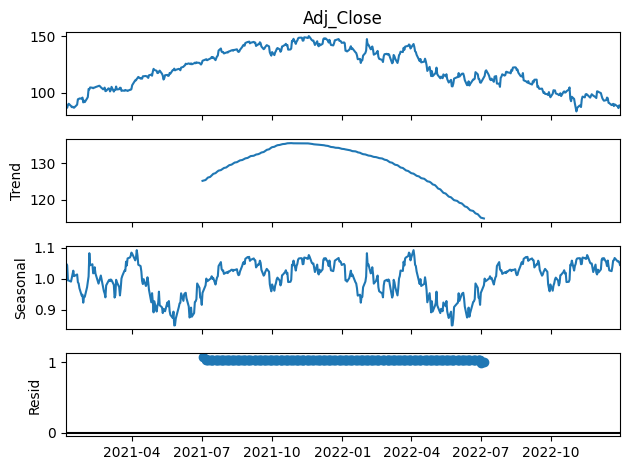

In [ ]:
# Realizar la descomposición estacional multiplicativa
result = seasonal_decompose(data['Adj_Close'], model='multiplicative' , period=251)

# Graficar los resultados
result.plot()
plt.show()

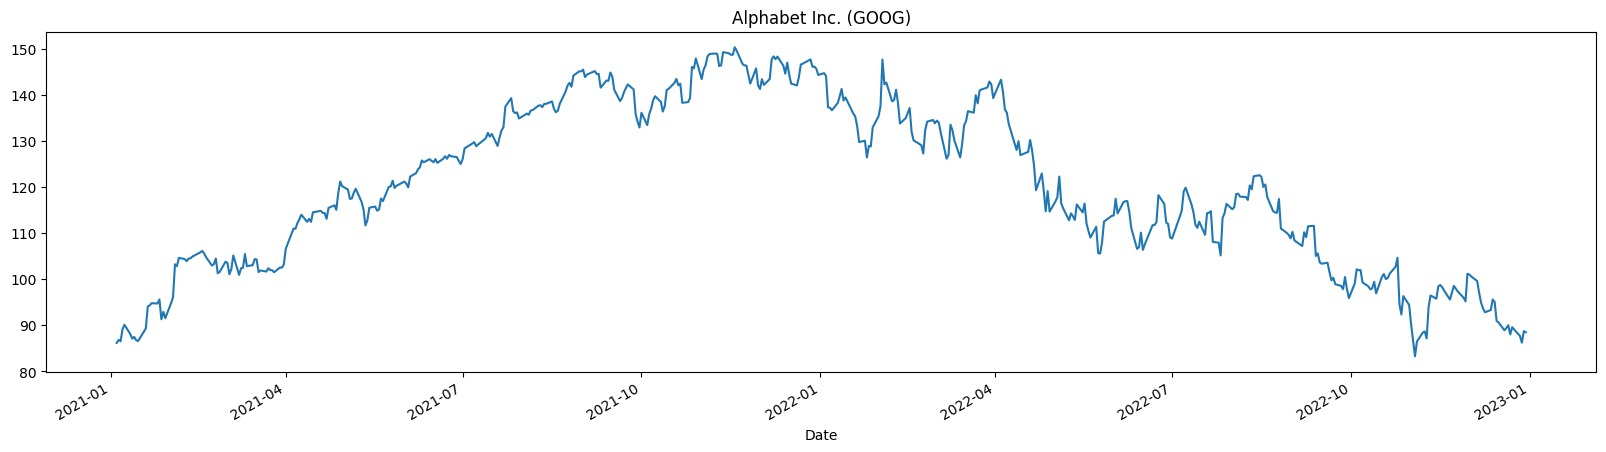

In [ ]:
# Codigo para dibujar la serie
data.Adj_Close.plot(figsize=(20,5), title = "Alphabet Inc. (GOOG)")
plt.show()

**Ejercicio 2=** Analice las particularidades del gráfico. Además, determine si guarda similitudes con un proceso de caminata aleatoria o ruido blanco, y explique las razones que fundamentan su elección.

In [ ]:
""" ESCRIBA AQUI SU RESPUESTA=




"""

El gráfico muestra la evolución del precio de las acciones de Alphabet Inc. (GOOG) desde principios de 2021 hasta principios de 2023. Analizaré sus características principales y evaluaré si se asemeja más a una caminata aleatoria o a un ruido blanco:
Características principales:

* Tendencia general: Se observa una tendencia alcista desde inicios de 2021 hasta finales de 2021, seguida de una tendencia bajista durante 2022.
* Volatilidad: El precio muestra fluctuaciones constantes, con períodos de mayor y menor volatilidad.
* Picos y valles: Se pueden identificar varios picos y valles notables, especialmente durante 2022.
* Ausencia de patrones cíclicos claros: No se observan patrones repetitivos evidentes.
* Continuidad: La serie temporal parece continua, sin saltos abruptos.

Comparación con caminata aleatoria y ruido blanco:
Este gráfico se asemeja más a un proceso de caminata aleatoria que a un ruido blanco por las siguientes razones:
* Persistencia en la dirección: Las caminatas aleatorias tienden a mostrar persistencia en la dirección del movimiento a corto plazo, lo cual es evidente en este gráfico. El ruido blanco, en cambio, fluctúa aleatoriamente alrededor de una media constante.
* Falta de reversión a la media: El precio no parece revertir constantemente a un valor medio, lo cual es característico de una caminata aleatoria. El ruido blanco tendería a oscilar alrededor de un valor central.
* Cambios en la tendencia: Se observan cambios en la tendencia a largo plazo (alcista en 2021, bajista en 2022), lo cual es consistente con una caminata aleatoria. El ruido blanco no mostraría tendencias sostenidas.
* Variabilidad no estacionaria: La volatilidad parece cambiar con el tiempo, lo cual es más típico de una caminata aleatoria que de un ruido blanco, que tendría una varianza constante.
* Dependencia temporal: Los valores futuros parecen depender de los valores pasados recientes, característica de una caminata aleatoria. En el ruido blanco, cada valor sería independiente de los anteriores.

En conclusión, aunque el precio de las acciones muestra algunas características aleatorias, su comportamiento se ajusta más a un proceso de caminata aleatoria que a un ruido blanco. Esto es consistente con la teoría del mercado eficiente en su forma débil, que sugiere que los precios de las acciones siguen un patrón de caminata aleatoria y que los precios futuros no pueden predecirse con certeza basándose únicamente en el historial de precios pasados.


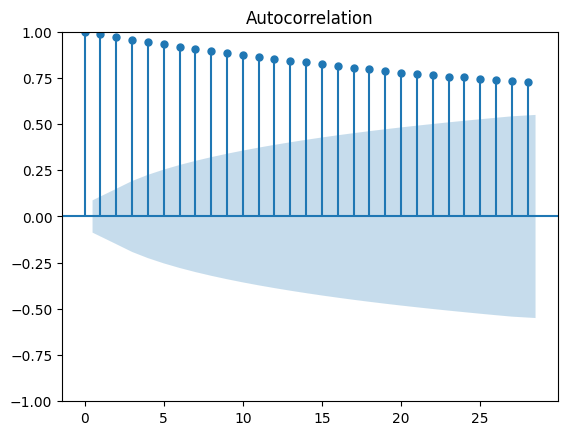

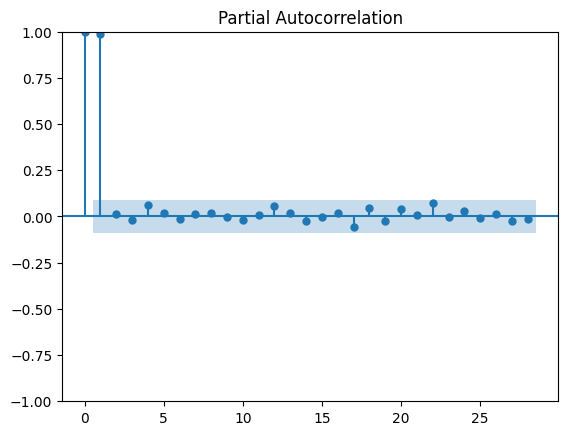

In [ ]:
# Codigo para funcion de autocorrelacion y autocorrelacion parcial
plot_acf(data['Adj_Close']);
plot_pacf(data['Adj_Close']);

**Ejercicio 3=** ¿Cuáles son los atributos fundamentales de una serie estacionaria? A través de cuál de los dos gráficos podríamos evaluar si existe una aproximación a la estacionariedad o no estacionariedad. Además, ¿cuál es la interpretación que se puede hacer del otro gráfico?

In [ ]:
""" ESCRIBA AQUI SU RESPUESTA=




"""

Para responder a sus preguntas, analizaré los atributos de una serie estacionaria y cómo estos gráficos nos ayudan a evaluar la estacionariedad.

1. Atributos fundamentales de una serie estacionaria:
Una serie de tiempo estacionaria tiene las siguientes características principales:
  * Media constante a lo largo del tiempo
  * Varianza constante a lo largo del tiempo
  * Autocorrelación que depende solo del rezago entre dos puntos de tiempo, no del tiempo en sí


2. Evaluación de la estacionariedad:
El gráfico que nos permite evaluar mejor la aproximación a la estacionariedad o no estacionariedad es el gráfico de Autocorrelación (Image 1).
Razones:
  * En una serie estacionaria, la autocorrelación debería disminuir rápidamente a medida que aumenta el rezago.
  * En este gráfico, vemos que la autocorrelación se mantiene alta incluso para rezagos grandes, decayendo muy lentamente.
  * Esta persistencia en la autocorrelación es un fuerte indicio de no estacionariedad.


3. Interpretación del otro gráfico (Partial Autocorrelation):
El gráfico de Autocorrelación Parcial (Image 2) nos proporciona información complementaria:

  * La autocorrelación parcial mide la correlación entre observaciones separadas por k periodos después de eliminar el efecto de los rezagos intermedios.
  * En este gráfico, vemos un pico significativo en el primer rezago (lag 1) y luego valores cercanos a cero para los demás rezagos.
  * Esto sugiere que la serie podría ser modelada como un proceso AR(1) (autorregresivo de primer orden).
  * Sin embargo, dada la evidencia de no estacionariedad del primer gráfico, este patrón en la autocorrelación parcial podría indicar que la serie es un paseo aleatorio o tiene una raíz unitaria.

En resumen, el gráfico de Autocorrelación (Image 1) es más útil para evaluar la estacionariedad, mostrando evidencia de no estacionariedad en este caso. El gráfico de Autocorrelación Parcial (Image 2) nos da pistas sobre la estructura de dependencia en la serie, sugiriendo un modelo AR(1) o posiblemente un paseo aleatorio, lo cual es consistente con la no estacionariedad observada en el primer gráfico.

In [ ]:
# Codigo para diferenciar la serie
data_diff=data.copy()
data_diff=data_diff.diff(axis = 0, periods = 1)


In [ ]:
# Eliminamos el valor nulo luego de la diferenciacion, para mayor comodidad en el trabajo de la serie
data_diff.drop(['2021-01-04'], inplace=True)

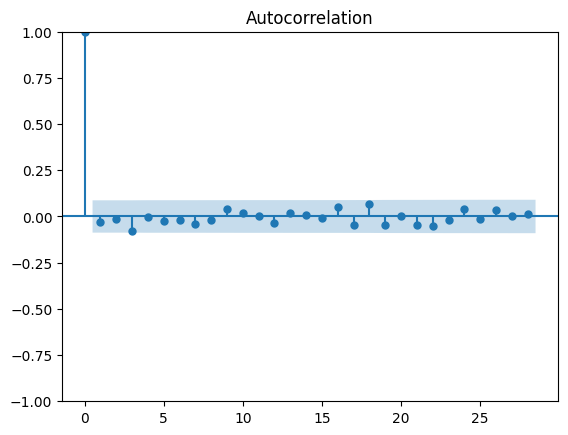

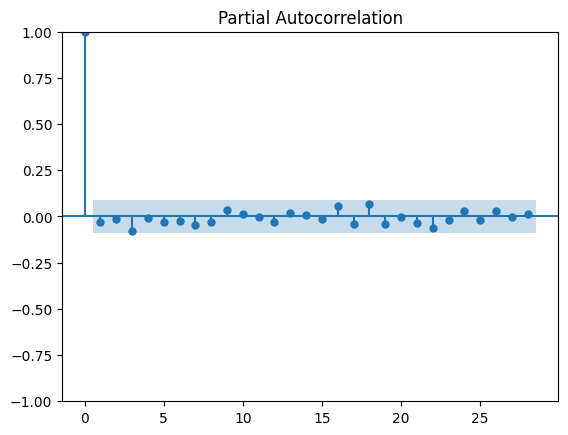

In [ ]:
#Nuevo ploteo de la funcion de autocorrelacion y autocorrelacion parcial
plot_acf(data_diff['Adj_Close']);
plot_pacf(data_diff['Adj_Close']);

**Ejercicio 4=** Analice nuevamente los graficos de funcion de autocorrelacion y autocorrelacion parcial, puntualizando las diferencias con el anterior.

In [ ]:
""" ESCRIBA AQUI SU RESPUESTA=




"""


Al observar los gráficos de función de autocorrelación (ACF) y autocorrelación parcial (PACF), aquí están los puntos clave de análisis:

Gráfico de Autocorrelación (ACF):
* Comportamiento en el rezago 0: La autocorrelación en el rezago 0 es siempre igual a 1, lo cual es esperado, ya que cada serie temporal está perfectamente correlacionada consigo misma.
* Comportamiento en los rezagos posteriores: Las barras de autocorrelación para los rezagos 1 y en adelante son bastante pequeñas y están dentro de las bandas de confianza, lo que indica que no hay autocorrelación significativa en los rezagos observados. Esto sugiere que la serie temporal no presenta un patrón de correlación fuerte en estos rezagos.

Conclusión del ACF: Al no haber valores significativos fuera de las bandas de confianza, la serie parece no tener un comportamiento estacional fuerte ni autocorrelación notable más allá del primer rezago.

Gráfico de Autocorrelación Parcial (PACF):
* Comportamiento en el rezago 1: El PACF en el rezago 1 es grande y significativo, lo que indica que el primer rezago está explicando una buena parte de la variabilidad de la serie temporal. Esto podría sugerir que un modelo AR(1) sería adecuado para capturar la dinámica de la serie.
* Comportamiento en rezagos posteriores: A partir del rezago 1, las correlaciones parciales son pequeñas y no significativas, lo que refuerza la idea de que sólo el primer rezago tiene importancia, y no parece haber un efecto de correlación más allá de esto.

Resumen:
* Autocorrelación (ACF): No hay indicaciones de correlación significativa más allá del rezago 0, lo que sugiere que la serie no tiene patrones cíclicos evidentes.
* Autocorrelación Parcial (PACF): El primer rezago es significativo, lo que sugiere que un modelo AR(1) (autoregresivo de primer orden) podría ser adecuado para modelar la serie.
Esto indica que la serie temporal podría ser estacionaria y que un modelo ARIMA con 𝑝=1,𝑑=0 y 𝑞=0 (AR(1)) podría ser un buen punto de partida para modelarla.

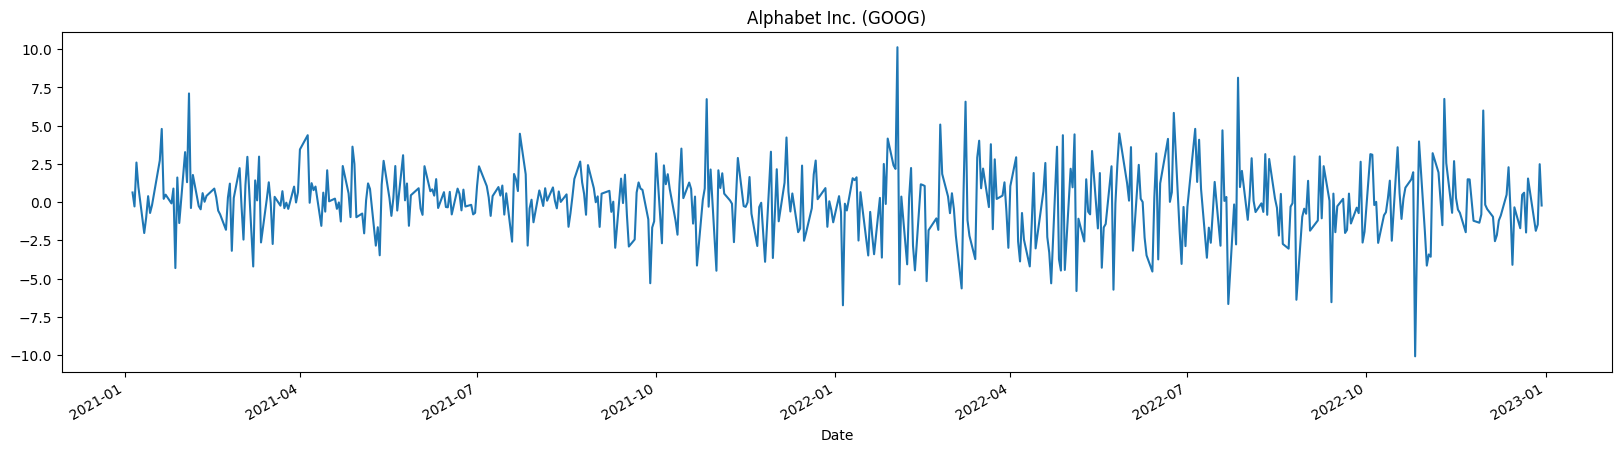

In [ ]:
# Grafico de la serie diferenciada
data_diff.Adj_Close.plot(figsize=(20,5), title = "Alphabet Inc. (GOOG)")
plt.show()

**Ejercicio 5=** Analice nuevamente las particularidades del gráfico. Además, determine si guarda similitudes con un proceso de caminata aleatoria o ruido blanco, y explique las razones que fundamentan su elección.

In [ ]:
""" ESCRIBA AQUI SU RESPUESTA =




"""

El gráfico muestra una serie temporal que corresponde a los retornos de Alphabet Inc. (GOOG) desde enero de 2021 hasta enero de 2023. Analicemos algunas particularidades y determinemos si guarda similitudes con un proceso de caminata aleatoria o ruido blanco:

Particularidades del gráfico:
* Variabilidad alta: Se observa una gran fluctuación en los valores a lo largo del tiempo, lo que es común en series de retornos financieros.
* Falta de tendencia clara: No se percibe una tendencia definida (creciente o decreciente) en el gráfico. Los valores parecen moverse alrededor de cero sin un patrón discernible.
* Volatilidad variable: Aunque el comportamiento en términos de niveles no muestra un patrón claro, la volatilidad (dispersión de los valores) parece variar en diferentes puntos del tiempo, con períodos de alta volatilidad y otros de menor volatilidad.

¿Caminata aleatoria o ruido blanco?

* Caminata aleatoria:
Un proceso de caminata aleatoria generalmente implica que el valor actual es el valor previo más un cambio aleatorio (posiblemente con tendencia). Este tipo de proceso suele mostrar movimientos acumulativos y no retorna con tanta frecuencia a un punto de referencia como el 0.
Similitud con caminata aleatoria: La serie aquí podría asemejarse ligeramente a una caminata aleatoria en que los retornos no parecen depender de sus valores previos, aunque las fluctuaciones observadas no son tan extremas ni sostenidas como en una típica caminata aleatoria.

* Ruido blanco:
El ruido blanco es un proceso donde las observaciones son independientes y distribuidas con media cero y varianza constante. En un gráfico de ruido blanco, no existiría autocorrelación significativa entre los valores y las variaciones serían aleatorias.
Similitud con ruido blanco: Esta serie parece más alineada con un proceso de ruido blanco, ya que las fluctuaciones parecen ser independientes entre sí, sin patrón discernible. El gráfico no muestra autocorrelaciones significativas ni tendencias visibles.

Conclusión:
* La serie parece tener un comportamiento más similar al ruido blanco, ya que:
 * No presenta autocorrelaciones o dependencia temporal aparente.
 * Las fluctuaciones parecen aleatorias alrededor de un promedio de cero.
 * No hay una tendencia a largo plazo o acumulación de valores, lo que descarta la caminata aleatoria como la mejor opción.
 * Sería útil confirmar esto calculando las funciones de autocorrelación (ACF) y autocorrelación parcial (PACF) para detectar la presencia de patrones o dependencias, pero visualmente se asemeja más a un ruido blanco.


<!DOCTYPE html>
<html>
<head>
</head>
<body font size="6">
    <h1>Ejercicio 6= Para finalizar, contestar estas tres preguntas en el espacio asignado a continuacion </h1>
    <ul>
        <li>
            <h2>Pregunta 6-A) Segun el libro de Daniel Peña, ¿cuál es la característica principal que se desprende al observar una serie de tiempo? </h2>
        </li>
            <h2></h2>
            <h2></h2>
    </ul>
</body>
</html>

In [ ]:
""" ESCRIBA AQUI SU RESPUESTA 6-A =



"""

Según el libro "Análisis de series temporales" de Daniel Peña, una de las características principales que se desprende al observar una serie de tiempo es la dependencia temporal. Esta característica se refiere a que las observaciones de la serie están generalmente correlacionadas entre sí, de modo que los valores pasados influyen en los valores presentes o futuros.

En contraste con series de datos independientes, en una serie temporal los valores adyacentes suelen estar relacionados, y esta dependencia puede ser descrita y modelada a través de diversas herramientas, como el análisis de autocorrelación (ACF) o el análisis de autocorrelación parcial (PACF).

La observación de una serie de tiempo debe centrarse en:
* Tendencias: Si hay un aumento o disminución sostenida a lo largo del tiempo.
* Estacionalidad: Fluctuaciones periódicas en la serie, que ocurren con una regularidad temporal.
* Ciclos: Variaciones a largo plazo que no necesariamente tienen un patrón regular como la estacionalidad.
* Ruido o fluctuaciones aleatorias: Componentes que no muestran ninguna dependencia o patrón evidente.

En resumen, la dependencia temporal es la característica principal, y observar si la serie presenta tendencia, estacionalidad o patrones cíclicos es clave para entender su comportamiento.

<!DOCTYPE html>
<html>
<head>

</head>
<body>
    <ul>
        <li>
            <h2>Pregunta 6-B) Mencione las principales diferencias entre la estacionaridad estricta y la debil</h2>
        </li>
    </ul>
</body>
</html>

In [ ]:
""" ESCRIBA AQUI SU RESPUESTA 6-B =



"""

La estacionaridad es un concepto fundamental en el análisis de series temporales y describe una propiedad de las series que no cambian sus características estadísticas a lo largo del tiempo. Existen dos tipos principales de estacionaridad: estacionaridad estricta y estacionaridad débil (o estacionaridad en el sentido amplio). Las diferencias clave son las siguientes:


**Estacionaridad estricta (o fuerte):**
Definición: Una serie de tiempo es estrictamente estacionaria si la distribución conjunta de cualquier subconjunto de observaciones es la misma, independientemente del tiempo en que estas se tomen. En otras palabras, las propiedades estadísticas de cualquier subconjunto de observaciones deben ser invariantes bajo un cambio de tiempo.
Propiedades constantes:
* Media (o esperanza matemática) constante.
* Varianza constante.
* Distribución (todas las distribuciones conjuntas) invariante en el tiempo.
* Más estricta: Este tipo de estacionaridad requiere que todas las propiedades estadísticas, incluidas las distribuciones conjuntas de las observaciones en diferentes tiempos, sean invariantes bajo desplazamientos temporales.
* Difícil de verificar en la práctica: Es poco usual encontrar series que cumplan estrictamente con esta definición, ya que la verificación de todas las distribuciones conjuntas es compleja.


**Estacionaridad débil (o en el sentido amplio):**
Definición: Una serie de tiempo es débilmente estacionaria si solo se requiere que las primeras dos propiedades estadísticas (media y varianza) sean constantes a lo largo del tiempo, y que la covarianza entre dos valores de la serie solo dependa de la distancia (o retraso, "lag") entre ellos, no del tiempo en que se midan.
Propiedades constantes:
* Media constante.
* Varianza constante.
* Covarianza constante (solo depende de la diferencia temporal, no del tiempo absoluto).
* Más flexible: Este concepto de estacionaridad es menos restrictivo, y por lo tanto, es más común en aplicaciones prácticas. En muchos casos, cuando se habla de estacionaridad, se refiere a este tipo.
* Aplicable en modelado: La mayoría de los modelos de series temporales (AR, MA, ARMA, ARIMA) se basan en la suposición de estacionaridad débil.


En resumen, la estacionaridad débil es menos restrictiva y más útil en la práctica, ya que se enfoca solo en la constancia de la media, varianza y covarianza, mientras que la estacionaridad estricta requiere que todas las distribuciones conjuntas de la serie permanezcan invariantes bajo desplazamientos temporales.





# 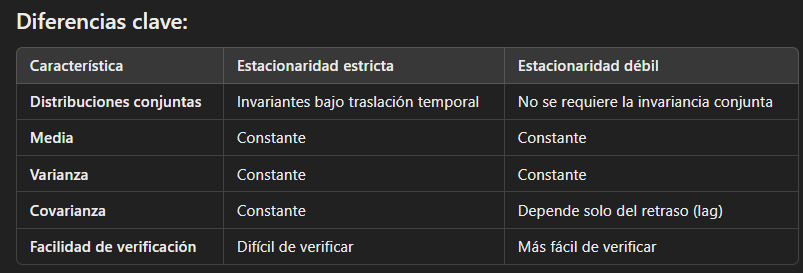

<!DOCTYPE html>
<html>
<head>

</head>
<body>
    <ul>
        <li>
            <h2>Pregunta 6-C) Al examinar los modelos autoregresivos, es deseable que las series temporales sean estacionarias. ¿Cuáles son los problemas más comunes que pueden evitar que las series temporales cumplan con esta estacionariedad?.</h2>
        </li>
    </ul>
</body>
</html>

In [ ]:
""" ESCRIBA AQUI SU RESPUESTA 6-C =







"""

Al examinar los modelos autorregresivos, la estacionariedad de las series temporales es indeed crucial. Sin embargo, existen varios problemas comunes que pueden impedir que una serie temporal sea estacionaria

# Problemas Comunes que Afectan la Estacionariedad de Series Temporales
Las series temporales no estacionarias presentan desafíos significativos para el modelado autorregresivo. A continuación, se detallan los problemas más frecuentes que pueden impedir que una serie temporal cumpla con la condición de estacionariedad:

1. Tendencia
Descripción:
La serie temporal muestra un patrón consistente de crecimiento o decrecimiento a largo plazo.
Impacto:
* Viola la condición de media constante.
* Puede llevar a correlaciones espurias y pronósticos poco confiables.

Ejemplo:
* El PIB de un país en crecimiento económico sostenido.

<br>
<br>

2. Estacionalidad
Descripción:
La serie exhibe patrones recurrentes en intervalos fijos (por ejemplo, diarios, mensuales, anuales).
Impacto:
* Viola las condiciones de media y varianza constantes.
* Puede ocultar otros patrones importantes en los datos.

Ejemplo:
Ventas minoristas que aumentan significativamente durante la temporada navideña cada año.

<br>
<br>

3. Ciclos
Descripción:
Fluctuaciones no periódicas en los datos que ocurren a intervalos irregulares.
Impacto:
* Pueden confundirse con tendencias a corto plazo.
* Dificultan la identificación de la verdadera estructura subyacente de la serie.

Ejemplo:
Ciclos económicos de expansión y recesión.



<br>
<br>

4. Cambios Estructurales
Descripción:
Alteraciones abruptas en el patrón de la serie debido a eventos externos o cambios en el sistema subyacente.
Impacto:
* Pueden crear múltiples regímenes en los datos, cada uno con diferentes características.
* Complican la modelación y predicción.

Ejemplo:
Cambios en políticas gubernamentales que afectan drásticamente las tasas de interés.


<br>
<br>

5. Heteroscedasticidad
Descripción:
La varianza de la serie cambia a lo largo del tiempo.
Impacto:
* Viola la condición de varianza constante.
* Puede llevar a estimaciones ineficientes y predicciones poco confiables.

Ejemplo:
Volatilidad cambiante en los precios de las acciones.

<br>
<br>

6. Dependencia de Largo Plazo
Descripción:
Correlaciones significativas persisten incluso para rezagos muy grandes.
Impacto:
* Puede indicar la presencia de memoria larga en la serie.
* Complica la modelación con técnicas estándar de series de tiempo.

Ejemplo:
Niveles de agua en ríos o lagos que muestran efectos persistentes de sequías o inundaciones pasadas.

<br>
<br>

7. Raíces Unitarias
Descripción:
La serie tiene una o más raíces unitarias en su representación autorregresiva.
Impacto:
* Implica que los choques tienen efectos permanentes en la serie.
* Conduce a regresiones espurias si no se maneja adecuadamente.

Ejemplo:
Precios de activos financieros que siguen un camino aleatorio.

<br>
<br>

Conclusión
* Identificar y abordar estos problemas es crucial para lograr la estacionariedad en series temporales. Técnicas como la diferenciación, la desestacionalización, y la transformación de datos pueden ayudar a mitigar estos problemas y preparar los datos para un modelado autorregresivo efectivo.

Estos son los problemas más comunes que pueden evitar que las series temporales cumplan con la estacionariedad requerida para los modelos autorregresivos. Cada uno de estos problemas presenta desafíos únicos para el análisis y modelado de series temporales.
La tendencia y la estacionalidad son particularmente frecuentes y pueden ser abordadas mediante técnicas como la diferenciación y la desestacionalización respectivamente. Los cambios estructurales y los ciclos pueden requerir enfoques más sofisticados, como modelos de cambio de régimen o análisis por segmentos.
La heteroscedasticidad a menudo se maneja con modelos GARCH o transformaciones de los datos. La dependencia de largo plazo puede requerir modelos de memoria larga como ARFIMA. Las raíces unitarias son un problema fundamental en econometría y finanzas, y se abordan típicamente mediante pruebas de raíz unitaria y técnicas de cointegración.
Identificar y abordar estos problemas es crucial para asegurar que los modelos autorregresivos sean válidos y produzcan pronósticos confiables.

<b><font size="5"> "FIN DEL EJERCICIO ASINCRONICO" - Muchas gracias! </b>